In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, threshold=np.nan)
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [4]:
data = pd.read_csv('villes.csv', sep=';')
X = data.ix[:,1:13].values
labels = data.ix[:,0].values
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
res = []
nb_component = 0
while sum(res) < .7:
    nb_component += 1
    pca = PCA(n_components=nb_component)
    pca.fit(X_scaled)
    pca.transform(X_scaled)
    res = pca.explained_variance_ratio_
print(nb_component)

1


In [5]:
pca2 = PCA(n_components=2)
pca2.fit(X_scaled)
X_pca = pca2.transform(X_scaled)

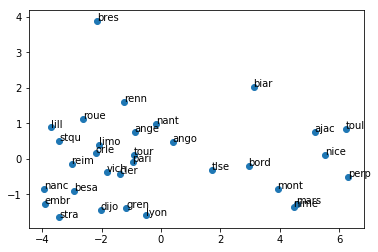

In [6]:
plt.scatter(X_pca[:,0], X_pca[:,1])
for label, x, y in zip(labels, X_pca[:,0], X_pca[:,1]):
    plt.annotate(label,xy=(x,y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [7]:
data2 = pd.read_csv('crime.csv', sep=';')
X2 = data2.ix[:,1:7].values
labels2 = data2.ix[:,0].values
scaler = StandardScaler()
scaler.fit(X2)
X2_scaled = scaler.transform(X2)
res = []
nb_component = 0
while sum(res) < .7:
    nb_component += 1
    pca = PCA(n_components=nb_component)
    pca.fit(X2_scaled)
    pca.transform(X2_scaled)
    res = pca.explained_variance_ratio_
print(nb_component)

2


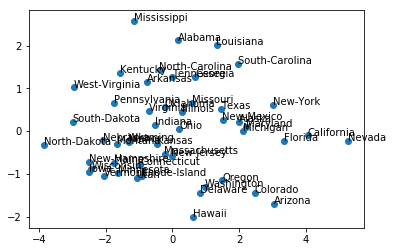

In [8]:
X2_pca = pca.transform(X2_scaled)
plt.scatter(X2_pca[:,0], X2_pca[:,1])
for label, x, y in zip(labels2, X2_pca[:,0], X2_pca[:,1]):
    plt.annotate(label,xy=(x,y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X2_pca)
clustering = kmeans.predict(X2_pca)

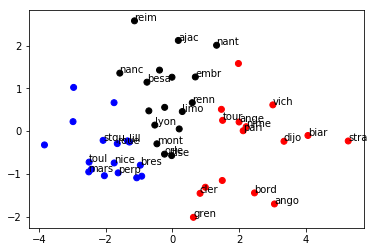

In [10]:
import matplotlib
colors = ['red', 'yellow', 'blue', 'black']
plt.scatter(X2_pca[:,0], X2_pca[:,1], c=clustering,
            cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X2_pca[:,0], X2_pca[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(-.2,.2), textcoords='offset points')
plt.show()

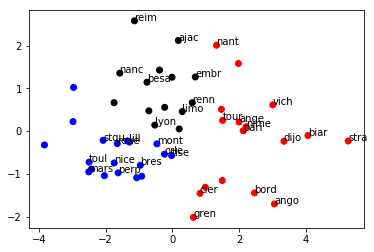

In [11]:
agglo = AgglomerativeClustering(linkage='ward', n_clusters=3)
c2 = agglo.fit_predict(X2_pca)
colors = ['red', 'yellow', 'blue', 'black']
plt.scatter(X2_pca[:,0], X2_pca[:,1], c=c2,
            cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X2_pca[:,0], X2_pca[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(-.2,.2), textcoords='offset points')
plt.show()

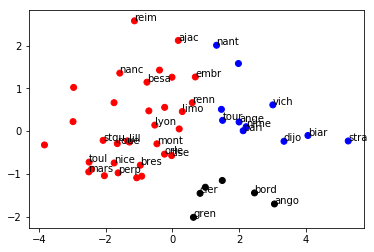

In [12]:
agglo = AgglomerativeClustering(linkage='average', n_clusters=3)
c2 = agglo.fit_predict(X2_pca)
colors = ['red', 'yellow', 'blue', 'black']
plt.scatter(X2_pca[:,0], X2_pca[:,1], c=c2,
            cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X2_pca[:,0], X2_pca[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(-.2,.2), textcoords='offset points')
plt.show()

In [13]:
from sklearn import metrics
m = -np.Inf
res = -1
for i in np.arange(2,6):
    clust = KMeans(n_clusters=i).fit_predict(X2_pca)
    if metrics.silhouette_score(X2_pca, clust, metric='euclidean') > m:
        res = i
        m = metrics.silhouette_score(X2_pca, clust, metric='euclidean')
print(res)
   

2


In [14]:
def dunn(c, distances):
    """
    Dunn index for cluster validation (the bigger, the better)
    """
    unique_cluster_distances = np.unique(min_cluster_distances(c, distances))
    max_diameter = max(diameter(c, distances))

    if np.size(unique_cluster_distances) > 1:
        return unique_cluster_distances[1] / max_diameter
    else:
        return unique_cluster_distances[0] / max_diameter

def min_cluster_distances(c, distances):
    """Calculates the distances between the two nearest points of each cluster"""
    min_distances = np.zeros((max(c) + 1, max(c) + 1))
    for i in np.arange(0, len(c)):
        if c[i] == -1: continue
        for ii in np.arange(i + 1, len(c)):
            if c[ii] == -1: continue
            if c[i] != c[ii] and distances[i, ii] > min_distances[c[i], c[ii]]:
                min_distances[c[i], c[ii]] = min_distances[c[ii], c[i]] = distances[i, ii]
    return min_distances

def diameter(c, distances):
    """Calculates cluster diameters (the distance between the two farthest data points in a cluster)"""
    diameters = np.zeros(max(c) + 1)
    for i in np.arange(0, len(c)):
        if c[i] == -1: continue
        for ii in np.arange(i + 1, len(c)):
            if c[ii] == -1: continue
            if c[i] != -1 or c[ii] != -1 and c[i] == c[ii] and distances[i, ii] > diameters[c[i]]:
                diameters[c[i]] = distances[i, ii]
    return diameters 

In [15]:
from sklearn.metrics import euclidean_distances
m = -np.Inf
res = -1
for i in np.arange(2,6):
    clust = KMeans(n_clusters=i).fit_predict(X2_pca)
    if dunn(clust, euclidean_distances(X2_pca, X2_pca)) > m:
        res = i
        m = dunn(clust, euclidean_distances(X2_pca, X2_pca))
print(res)


2


In [2]:
def get_value(s):
    if s == '+':
        return 1
    return 0

credit = pd.read_csv('credit.data', delimiter='\t', header=None, decimal='.')
credit.dropna(thresh=0, inplace=True)
credit[15] = credit[15].map(get_value)
credit_num = credit.ix[:,(1, 2, 7, 10, 13, 14, 15)]
for col in credit_num.columns:
    credit_num[col] = pd.to_numeric(credit_num[col], errors='coerce')

credit_num.dropna(inplace=True)
credit_label = credit_num.loc[:,15]
credit_X_num = credit_num.loc[:,(1, 2, 7, 10, 13, 14)]
credit_X_num[10] = credit_X_num[10].astype('float64')
credit_X_num[14] = credit_X_num[14].astype('float64')

In [7]:
sum(credit_X_num[1].isna())

0

Descriptions des données par colonne

In [8]:
credit_X_num.describe()

,1,2,7,10,13,14
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000
mean,31.569054,4.798078,2.222320,2.459459,182.115616,998.584084
std,11.920174,5.005309,3.347599,4.929794,171.477919,5202.975198
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.602500,1.010000,0.165000,0.000000,75.250000,0.000000
50%,28.500000,2.750000,1.000000,0.000000,160.000000,5.000000
75%,38.250000,7.207500,2.585000,3.000000,271.000000,399.000000
max,80.250000,28.000000,28.500000,67.000000,2000.000000,100000.000000


Répartition des + et - dans la base d'apprentissage

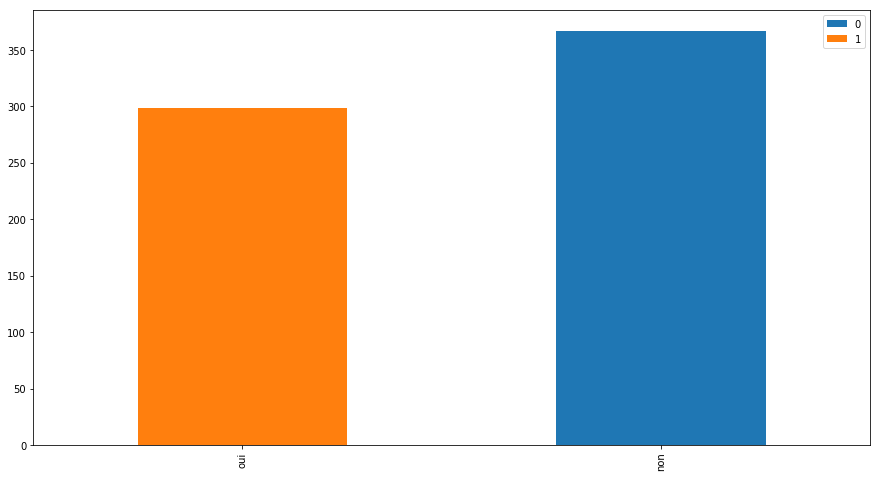

In [9]:
oui = credit_label[credit_label == 1].value_counts()
non = credit_label[credit_label == 0].value_counts()
df = pd.DataFrame([oui, non])
df.index = ['oui','non']
df.plot(kind='bar', stacked=True, figsize=(15,8))

In [5]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler

/home/romain/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [165]:
def ajout_PCA(X, min_acp=.7, replace=False):
    res = list()
    nb_component = 0
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    while sum(res)<min_acp:
        nb_component += 1
        pca = PCA(n_components=nb_component)
        pca.fit_transform(X)
        res = pca.explained_variance_ratio_
    pca = PCA(n_components=nb_component)
    if replace:
        return pca.fit_transform(X)
    else:
        ajout = pca.fit_transform(X)
        X = np.concatenate((X, ajout), axis=1)
    return X

In [101]:
def run_classifiers(clfs, X, y, standardisation=True, engineering=False, replace=False, min_acp=.7):
    if not standardisation and engineering:
        raise AttributeError('you have to scale if you want to add pca variables')
    if standardisation:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        
    if engineering:
        X = ajout_PCA(X, min_acp, replace)
    kf = KFold(n_splits=10, shuffle=True, random_state=20)
    r = list()
    for name, clf in clfs.items():
        
        cv_acc = cross_validate(clf, X, y, cv=kf, scoring=('accuracy', 'roc_auc', 'recall', 'precision'))
       # lul
        r.append([name,
                  str(np.round(np.mean(cv_acc['test_accuracy']),4)) + ' +/- ' + str(np.round(np.std(cv_acc['test_accuracy']),4)),
                  str(np.round(np.mean(cv_acc['test_roc_auc']),4)) + ' +/- ' + str(np.round(np.std(cv_acc['test_roc_auc']),4)),
                  str(np.round(np.mean(cv_acc['test_recall']),4)) + ' +/- ' + str(np.round(np.std(cv_acc['test_recall']),4)),
                  str(np.round(np.mean(cv_acc['test_precision']),4)) + ' +/- ' + str(np.round(np.std(cv_acc['test_precision']),4)),
                  str(np.round(np.mean(cv_acc['fit_time']),4)) + 's'])
    res = pd.DataFrame(r)
    res.columns = ['Name', 'Accuracy', 'AUC','Recall','Precision', 'Time']
    return res

In [102]:
clfs={
'Tree': DecisionTreeClassifier(random_state=20),
'RF': RandomForestClassifier(n_estimators=50, random_state=20),
'Bagg': BaggingClassifier(n_estimators=50, random_state=20),
'KNN': KNeighborsClassifier(n_neighbors=1),
'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=20),
'SVM': SVC(),
'XGBOOST': XGBClassifier(
 n_estimators=50,
 seed=20),
"MLPC": MLPClassifier(hidden_layer_sizes=(20, 10))
}


In [103]:
run_classifiers(clfs, credit_X_num, credit_label, standardisation=False, engineering=False)

,Name,Accuracy,AUC,Recall,Precision,Time
0,Tree,0.6923 +/- 0.0474,0.6921 +/- 0.0493,0.6552 +/- 0.0911,0.6612 +/- 0.0612,0.003s
1,RF,0.7839 +/- 0.061,0.85 +/- 0.0588,0.7214 +/- 0.1066,0.792 +/- 0.1082,0.0732s
2,Bagg,0.7733 +/- 0.0607,0.8476 +/- 0.053,0.695 +/- 0.1175,0.7917 +/- 0.1162,0.0953s
3,KNN,0.6563 +/- 0.0547,0.6501 +/- 0.0608,0.5659 +/- 0.1179,0.6289 +/- 0.0937,0.001s
4,AdaBoost,0.7763 +/- 0.0491,0.8532 +/- 0.0431,0.7191 +/- 0.1143,0.7796 +/- 0.0949,0.0698s
5,SVM,0.5464 +/- 0.0458,0.6702 +/- 0.0599,0.0308 +/- 0.0245,0.365 +/- 0.2984,0.0137s
6,XGBOOST,0.7913 +/- 0.047,0.8637 +/- 0.0453,0.7088 +/- 0.1019,0.8136 +/- 0.0837,0.011s
7,MLPC,0.6515 +/- 0.1009,0.7017 +/- 0.1011,0.6481 +/- 0.156,0.6482 +/- 0.1371,0.0333s


On voit que le SVM ne fonctionne pas très bien (probleme de données non normalisées)
On voit aussi que les methodes ensemblistes semblent bien fonctionner sans avoir encore cherché les "meilleurs" hyperparamètres

In [14]:
run_classifiers(clfs, credit_X_num, credit_label, standardisation=True,engineering=False)

,Name,Accuracy,AUC,Recall,Precision,Time
0,Tree,0.6908 +/- 0.048,0.6905 +/- 0.0497,0.6552 +/- 0.0911,0.6582 +/- 0.057,0.0023s
1,RF,0.7839 +/- 0.061,0.8496 +/- 0.058,0.7214 +/- 0.1066,0.792 +/- 0.1082,0.0742s
2,Bagg,0.7749 +/- 0.0597,0.8479 +/- 0.0525,0.698 +/- 0.1152,0.7923 +/- 0.1165,0.0961s
3,KNN,0.7163 +/- 0.0298,0.7172 +/- 0.0314,0.6696 +/- 0.1089,0.7027 +/- 0.0777,0.0006s
4,AdaBoost,0.7763 +/- 0.0491,0.8532 +/- 0.0431,0.7191 +/- 0.1143,0.7796 +/- 0.0949,0.0693s
5,SVM,0.7688 +/- 0.0633,0.8444 +/- 0.0489,0.6118 +/- 0.1108,0.844 +/- 0.0967,0.0101s
6,XGBOOST,0.7928 +/- 0.0468,0.8638 +/- 0.0454,0.7088 +/- 0.1019,0.817 +/- 0.0812,0.0111s
7,MLPC,0.7884 +/- 0.0601,0.8566 +/- 0.039,0.7003 +/- 0.1071,0.8131 +/- 0.0964,0.2894s


On voit qu'après normalisation, MLPC, SVM et KNN performent bien mieux que sans alors que pour les méthodes ensemblistes et l'arbre cela n'a rien changé de manière significative

In [15]:
run_classifiers(clfs, credit_X_num, credit_label, standardisation=True,engineering=True, replace=True)

,Name,Accuracy,AUC,Recall,Precision,Time
0,Tree,0.6653 +/- 0.0626,0.669 +/- 0.0658,0.644 +/- 0.1329,0.6306 +/- 0.085,0.003s
1,RF,0.7209 +/- 0.0574,0.7973 +/- 0.053,0.6516 +/- 0.1205,0.7164 +/- 0.0858,0.0816s
2,Bagg,0.718 +/- 0.0593,0.7893 +/- 0.0431,0.6334 +/- 0.1073,0.7169 +/- 0.1001,0.0967s
3,KNN,0.7073 +/- 0.0554,0.7097 +/- 0.0546,0.6579 +/- 0.1069,0.6966 +/- 0.1097,0.0005s
4,AdaBoost,0.727 +/- 0.0612,0.7844 +/- 0.0538,0.6576 +/- 0.078,0.7169 +/- 0.1008,0.0732s
5,SVM,0.7417 +/- 0.0672,0.7967 +/- 0.0585,0.561 +/- 0.1187,0.8174 +/- 0.0936,0.0104s
6,XGBOOST,0.7358 +/- 0.0452,0.8004 +/- 0.0445,0.6476 +/- 0.0745,0.7433 +/- 0.0868,0.0115s
7,MLPC,0.7463 +/- 0.0669,0.8147 +/- 0.0627,0.6208 +/- 0.1133,0.7788 +/- 0.0967,0.2859s


In [16]:
run_classifiers(clfs, credit_X_num, credit_label, standardisation=True,engineering=True, replace=False)

,Name,Accuracy,AUC,Recall,Precision,Time
0,Tree,0.7223 +/- 0.0389,0.7249 +/- 0.0401,0.7042 +/- 0.0952,0.6939 +/- 0.0795,0.0053s
1,RF,0.7779 +/- 0.0493,0.8489 +/- 0.0496,0.7121 +/- 0.0998,0.7904 +/- 0.1,0.0859s
2,Bagg,0.7689 +/- 0.0477,0.8516 +/- 0.0507,0.7037 +/- 0.1167,0.7802 +/- 0.1005,0.1511s
3,KNN,0.7148 +/- 0.0393,0.7161 +/- 0.0408,0.6644 +/- 0.1167,0.7035 +/- 0.082,0.0006s
4,AdaBoost,0.7853 +/- 0.0357,0.8465 +/- 0.0477,0.7261 +/- 0.0808,0.7873 +/- 0.0778,0.0831s
5,SVM,0.7688 +/- 0.0587,0.8389 +/- 0.0475,0.607 +/- 0.0874,0.8475 +/- 0.1049,0.011s
6,XGBOOST,0.7884 +/- 0.0517,0.8617 +/- 0.0539,0.6941 +/- 0.1164,0.8152 +/- 0.0769,0.0145s
7,MLPC,0.7824 +/- 0.0647,0.848 +/- 0.0404,0.6975 +/- 0.1193,0.799 +/- 0.0838,0.2906s


On va essayer de trouver de bons hyperparamètres pour RF, XGBOOST et SVM

In [106]:
#fonction d'affchage
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [104]:
X = ajout_PCA(credit_X_num)
kf = KFold(n_splits=10, shuffle=True, random_state=20)

In [107]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as unif
#scoring = {'AUC': 'roc_auc', 'Accuracy': 'accuracy'}
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 6),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True],
              "n_estimators": sp_randint(20,200),
              "criterion": ["gini", "entropy"]}

rs = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                   cv=kf, param_distributions=param_dist, n_iter=100, verbose=1, n_jobs=-1)
rs.fit(X, credit_label)
report(rs.cv_results_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 517 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 878 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.4min finished


Model with rank: 1
Mean validation score: 0.778 (std: 0.055)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 144}

Model with rank: 2
Mean validation score: 0.776 (std: 0.055)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 50}

Model with rank: 2
Mean validation score: 0.776 (std: 0.064)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 191}



In [88]:
param_dist = {'max_depth': sp_randint(1, 10),
              'learning_rate': unif(0, 1),
              'n_estimators': sp_randint(50, 500),
              'gamma': unif(0, 1),
              'reg_alpha': unif(0, 1),
              'reg_lambda': unif(0, 1),
              'subsample' : unif(0, 1),
              'colsample_bytree' : np.arange(.3, 1, .05)
             }

rs = RandomizedSearchCV(XGBClassifier(seed=20, nthread=1, silent=True),
                   cv=kf, param_distributions=param_dist, n_iter=1000,scoring='accuracy', verbose=0.5, n_jobs=-1)
rs.fit(X, credit_label)
report(rs.cv_results_)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 863 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 1691 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 2846 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4337 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 6155 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 8306 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 9993 out of 10000 | elapsed:  5.5min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:  5.5min finished


Model with rank: 1
Mean validation score: 0.812 (std: 0.043)
Parameters: {'colsample_bytree': 0.34999999999999998, 'gamma': 0.89224135604590471, 'learning_rate': 0.16864211763697767, 'max_depth': 7, 'n_estimators': 145, 'reg_alpha': 0.64729338784203116, 'reg_lambda': 0.47857294292628538, 'subsample': 0.27376425530815984}

Model with rank: 2
Mean validation score: 0.808 (std: 0.050)
Parameters: {'colsample_bytree': 0.89999999999999991, 'gamma': 0.59258123641458571, 'learning_rate': 0.27039161463880712, 'max_depth': 1, 'n_estimators': 208, 'reg_alpha': 0.94044946111248784, 'reg_lambda': 0.10787029468250053, 'subsample': 0.74868525737225899}

Model with rank: 2
Mean validation score: 0.808 (std: 0.052)
Parameters: {'colsample_bytree': 0.64999999999999991, 'gamma': 0.98866459801536766, 'learning_rate': 0.090734245554655701, 'max_depth': 1, 'n_estimators': 290, 'reg_alpha': 0.51758163106998356, 'reg_lambda': 0.58489029205322818, 'subsample': 0.65804664247905331}

Model with rank: 2
Mean val

In [106]:
param_dist = {'C':sp_randint(1, 100),
              'gamma': sp_randint(1, 100),
              'kernel':  ['linear', 'rbf', 'sigmoid']
             }

rs = RandomizedSearchCV(SVC(random_state=20),
                   cv=kf, param_distributions=param_dist, n_iter=1000,scoring='accuracy', verbose=.5, n_jobs=-1)
rs.fit(X, credit_label)
report(rs.cv_results_)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 1940 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 2710 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3907 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 5535 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 7005 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 9741 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 9993 out of 10000 | elapsed:  5.9min remaining:    0.2s


Model with rank: 1
Mean validation score: 0.764 (std: 0.062)
Parameters: {'C': 24, 'gamma': 18, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.764 (std: 0.062)
Parameters: {'C': 13, 'gamma': 15, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.764 (std: 0.062)
Parameters: {'C': 11, 'gamma': 30, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.764 (std: 0.062)
Parameters: {'C': 10, 'gamma': 90, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.764 (std: 0.062)
Parameters: {'C': 10, 'gamma': 7, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.764 (std: 0.062)
Parameters: {'C': 13, 'gamma': 65, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.764 (std: 0.062)
Parameters: {'C': 10, 'gamma': 12, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.764 (std: 0.062)
Parameters: {'C': 10, 'gamma': 48, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.764 (std: 0.062)
Para

[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:  5.9min finished


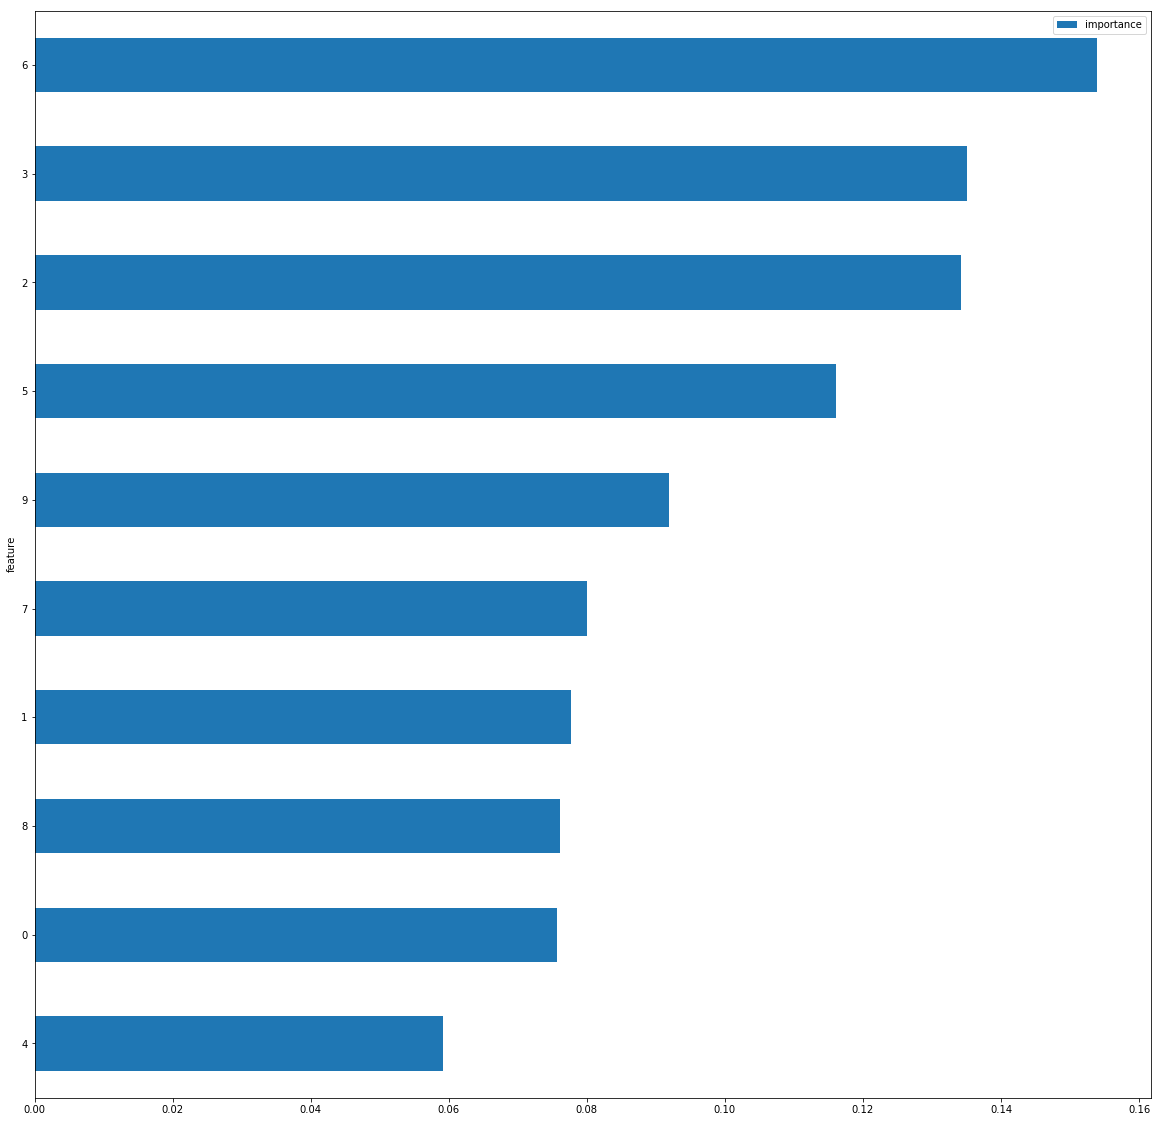

In [100]:
df = pd.DataFrame(X)
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X, credit_label)
features = pd.DataFrame()
features['feature'] = df.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(20, 20))

In [185]:
def keep_important(X, importance, min_take=.08):
    res = [X[:,i] for i, x in enumerate(X[0,:]) if importance[i]> min_take ]
    return np.array(res).T

X_select = keep_important(X, clf.feature_importances_)

In [92]:
run_classifiers(clfs, X_select, credit_label)

,Name,Accuracy,AUC,Recall,Precision,Time
0,Tree,0.7059 +/- 0.0492,0.7065 +/- 0.0505,0.6878 +/- 0.0802,0.6713 +/- 0.0865,0.0023s
1,RF,0.7628 +/- 0.0451,0.829 +/- 0.0566,0.6885 +/- 0.109,0.7677 +/- 0.0659,0.0736s
2,Bagg,0.7599 +/- 0.0523,0.8162 +/- 0.0671,0.6856 +/- 0.1178,0.7659 +/- 0.0822,0.0951s
3,KNN,0.6983 +/- 0.0565,0.6979 +/- 0.053,0.6477 +/- 0.0699,0.6814 +/- 0.1021,0.0006s
4,AdaBoost,0.772 +/- 0.0686,0.8411 +/- 0.0551,0.6895 +/- 0.1146,0.7925 +/- 0.1121,0.0701s
5,SVM,0.7614 +/- 0.0577,0.8352 +/- 0.0559,0.5957 +/- 0.1099,0.8328 +/- 0.0834,0.0096s
6,XGBOOST,0.7794 +/- 0.0549,0.8486 +/- 0.0537,0.6637 +/- 0.1215,0.8174 +/- 0.0738,0.0102s
7,MLPC,0.7659 +/- 0.0497,0.8401 +/- 0.0517,0.6574 +/- 0.0957,0.797 +/- 0.0858,0.2795s


Après feature selection...

Donnée manquante

In [145]:
from sklearn.preprocessing import Imputer, OneHotEncoder

In [146]:
credit = pd.read_csv('credit.data', delimiter='\t', header=None, decimal='.')

In [180]:
col_num = [1, 2, 7, 10, 13, 14]
col_cat = [i for i in range(0, 15) if i not in var_num]
X = credit.values
X_cat = np.copy(X[:,col_cat])
y = [get_value(x) for x in X[:,15]]
for col_id in range(len(col_cat)):
    unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse=True)
    X_cat[:, col_id] = val_idx

imp_cat = Imputer(missing_values=0, strategy='most_frequent')
X_cat[:, range(5)] = imp_cat.fit_transform(X_cat[:, range(5)])
X_cat_bin = OneHotEncoder().fit_transform(X_cat).toarray()
X_num = np.copy(X[:, col_num])
X_num[X_num == '?'] = np.nan
X_num = X_num.astype(float)
imp_num = Imputer(missing_values=np.nan, strategy='mean')
X_num = imp_num.fit_transform(X_num)
X_num = ajout_PCA(X_num)

In [181]:
data = np.concatenate((X_num, X_cat_bin), axis=1)

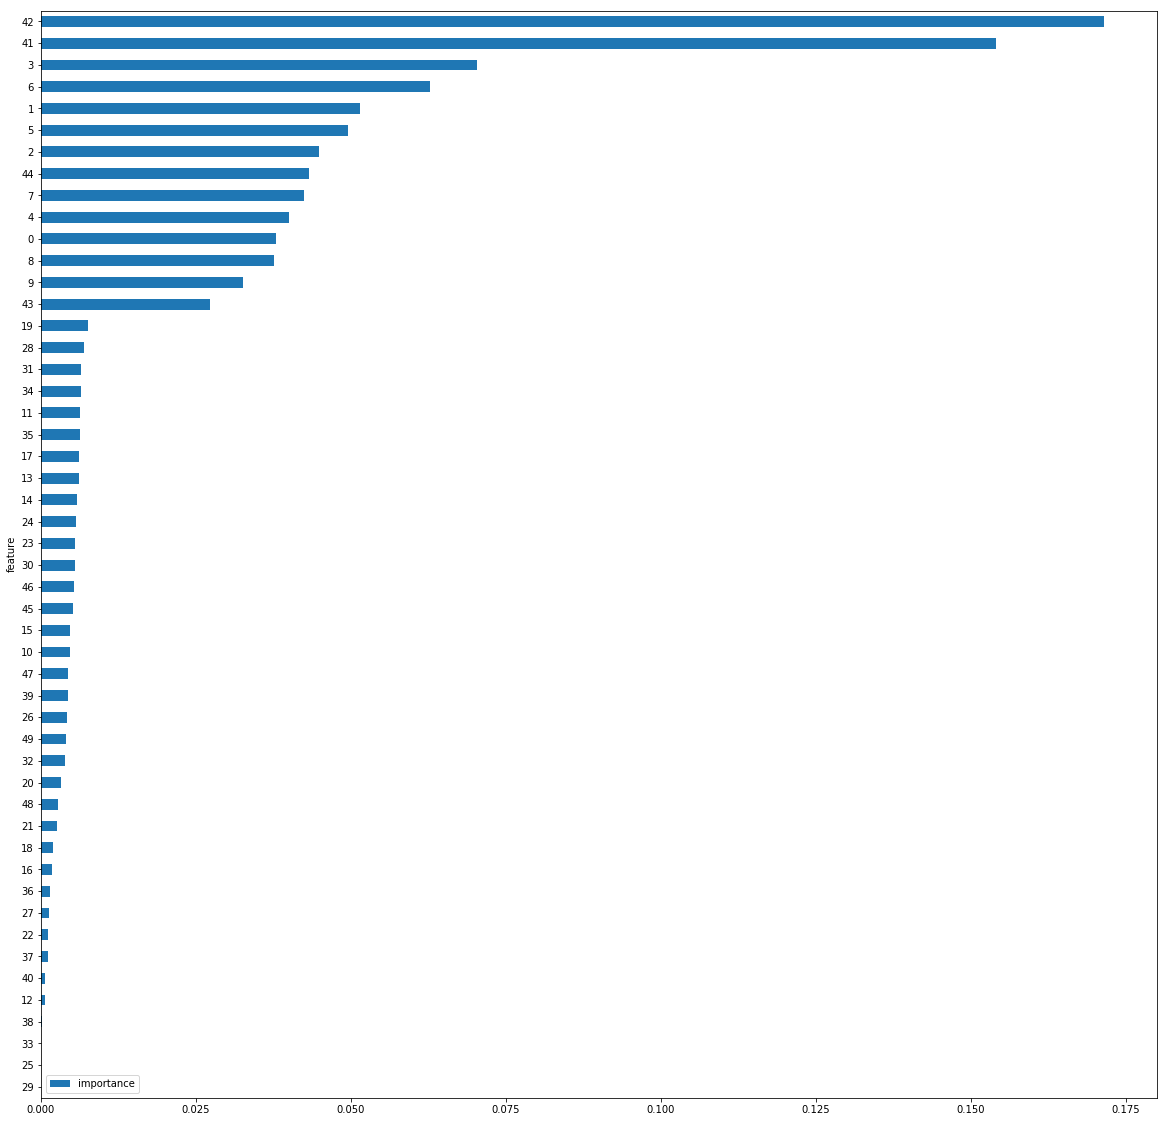

In [182]:
df = pd.DataFrame(data)
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(data, y)
features = pd.DataFrame()
features['feature'] = df.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(20, 20))

In [186]:
data_select = keep_important(data, clf.feature_importances_, .01)

In [190]:
run_classifiers(clfs, data_select, y)

,Name,Accuracy,AUC,Recall,Precision,Time
0,Tree,0.785 +/- 0.0486,0.7857 +/- 0.0509,0.7775 +/- 0.0751,0.7498 +/- 0.065,0.0037s
1,RF,0.8634 +/- 0.0317,0.9208 +/- 0.0257,0.8484 +/- 0.0478,0.8428 +/- 0.0623,0.0764s
2,Bagg,0.8504 +/- 0.028,0.9181 +/- 0.0203,0.835 +/- 0.0433,0.8255 +/- 0.0633,0.1303s
3,KNN,0.8228 +/- 0.0344,0.8194 +/- 0.0346,0.7782 +/- 0.0422,0.8131 +/- 0.0697,0.0006s
4,AdaBoost,0.8416 +/- 0.0322,0.9119 +/- 0.028,0.835 +/- 0.0716,0.8087 +/- 0.0599,0.0833s
5,SVM,0.8519 +/- 0.0253,0.9167 +/- 0.0257,0.9056 +/- 0.0434,0.7891 +/- 0.0628,0.0105s
6,XGBOOST,0.8577 +/- 0.0262,0.9308 +/- 0.0168,0.8498 +/- 0.0539,0.8315 +/- 0.0664,0.0174s
7,MLPC,0.8692 +/- 0.0205,0.9248 +/- 0.0286,0.8504 +/- 0.0636,0.8572 +/- 0.0542,0.2619s


On voit que la performance des classifiers est globalement bien meilleure même sans avoir chercher les hyperparamètres "optimaux"

TP3

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold, cross_validate, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, recall_score, precision_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

/home/romain/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
sms = pd.read_csv('SMSSpamCollection.data', delimiter="\t", header=None)
sms.columns = ['label', 'sms']
sms.label = sms.label.map(lambda x: int(x == 'spam'))

In [6]:
kf = StratifiedKFold(n_splits=9, shuffle=True, random_state=20)

In [7]:
def run_one_classfier(nclf, X, y, verbose=0):
    r = list()
    name, clf= nclf
    X0 = X
    print('{} commence'.format(name))
    if name == "XGBOOST":
        try:
            X0 = X0.toarray()
        except AttributeError:
            X0 = X
    cv_acc = cross_validate(clf, X0, y, cv=kf, scoring=('accuracy', 'roc_auc', 'recall', 'precision'),
               return_train_score=True, verbose=verbose, n_jobs=3)
    r.extend([name,
          str(np.round(np.mean(cv_acc['test_accuracy']),4)) + ' +/- ' + str(np.round(np.std(cv_acc['test_accuracy']),4)),
          str(np.round(np.mean(cv_acc['test_roc_auc']),4)) + ' +/- ' + str(np.round(np.std(cv_acc['test_roc_auc']),4)),
          str(np.round(np.mean(cv_acc['test_recall']),4)) + ' +/- ' + str(np.round(np.std(cv_acc['test_recall']),4)),
          str(np.round(np.mean(cv_acc['test_precision']),4)) + ' +/- ' + str(np.round(np.std(cv_acc['test_precision']),4)),
          str(np.round(np.mean(cv_acc['fit_time']),4)) + 's'])
    print('{} fini'.format(name))
    return r

def run_all_classifier(clfs, X, y):
    # r = list(map(run_one_classfier, clfs))
    r = [run_one_classfier(c, X, y) for c in clfs]
    res = pd.DataFrame(r)
    res.columns = ['Name', 'Accuracy', 'AUC','Recall','Precision', 'Time']
    return res

In [10]:
cclfs=(
    ('Tree', DecisionTreeClassifier(random_state=20)),
    ('RF', RandomForestClassifier(n_estimators=50, random_state=20)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=50, random_state=20)),
    ('SVM', SVC()),
    ('XGBOOST', XGBClassifier(
        n_estimators=50,
        seed=20)),
    ("MLPC", MLPClassifier(hidden_layer_sizes=(20, 10),solver='lbfgs' ))
)
vectorizer1 = CountVectorizer()
X1 = vectorizer1.fit_transform(contenue)

etape1 = run_all_classifier(cclfs, X1, y)

Tree commence


ValueError: Found input variables with inconsistent numbers of samples: [1, 5572]

In [73]:
etape1

,Name,Accuracy,AUC,Recall,Precision,Time
0,Tree,0.9718 +/- 0.0079,0.9283 +/- 0.0213,0.8688 +/- 0.0403,0.9168 +/- 0.0279,0.2706s
1,RF,0.9761 +/- 0.0066,0.9918 +/- 0.0075,0.822 +/- 0.0494,1.0 +/- 0.0,2.3199s
2,AdaBoost,0.9731 +/- 0.0069,0.9747 +/- 0.0131,0.8434 +/- 0.0406,0.95 +/- 0.0183,2.084s
3,SVM,0.8659 +/- 0.0001,0.9846 +/- 0.0088,0.0 +/- 0.0,0.0 +/- 0.0,1.4328s
4,XGBOOST,0.96 +/- 0.005,0.9756 +/- 0.0108,0.7376 +/- 0.0397,0.954 +/- 0.0207,55.7598s
5,MLPC,0.9849 +/- 0.0064,0.9776 +/- 0.0123,0.8916 +/- 0.0454,0.9954 +/- 0.0065,10.7072s


In [3]:
vectorizer2 = TfidfVectorizer()
X2 = vectorizer2.fit_transform(contenue)

NameError: name 'contenue' is not defined

In [71]:
cclfs2=(
    ('Tree', DecisionTreeClassifier(random_state=20)),
    ('RF', RandomForestClassifier(n_estimators=50, random_state=20)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=50, random_state=20)),
    ('XGBOOST', XGBClassifier(
        n_estimators=50,
        seed=20)),
    ("MLPC", MLPClassifier(hidden_layer_sizes=(20, 10), solver='lbfgs'))
)
etape2 = run_all_classifier(cclfs2, X2, y)

Tree commence
Tree fini
RF commence
RF fini
AdaBoost commence
AdaBoost fini
XGBOOST commence
XGBOOST fini
MLPC commence
MLPC fini


In [72]:
etape2

,Name,Accuracy,AUC,Recall,Precision,Time
0,Tree,0.9681 +/- 0.0037,0.9233 +/- 0.0162,0.8621 +/- 0.0355,0.8973 +/- 0.0283,0.4894s
1,RF,0.9761 +/- 0.0073,0.9927 +/- 0.0064,0.822 +/- 0.0544,1.0 +/- 0.0,2.3254s
2,AdaBoost,0.9747 +/- 0.0045,0.976 +/- 0.0114,0.8728 +/- 0.0322,0.9352 +/- 0.0274,2.3647s
3,XGBOOST,0.9643 +/- 0.0053,0.978 +/- 0.0101,0.7644 +/- 0.0364,0.9613 +/- 0.0142,55.8463s
4,MLPC,0.9822 +/- 0.0044,0.9888 +/- 0.0056,0.8942 +/- 0.0315,0.9712 +/- 0.0145,6.6384s


In [76]:
svd = TruncatedSVD(n_components=100).fit(X2)
X3 = svd.transform(X2)

cclfs3=(
    ('Tree', DecisionTreeClassifier(random_state=20)),
    ('RF', RandomForestClassifier(n_estimators=50, random_state=20)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=50, random_state=20)),
    ('SVC', SVC()),
    ('XGBOOST', XGBClassifier(
        n_estimators=50,
        seed=20)),
    ("MLPC", MLPClassifier(hidden_layer_sizes=(20, 10), solver='lbfgs'))
)

etape3 = run_all_classifier(cclfs3, X3, y)

Tree commence
Tree fini
RF commence
RF fini
AdaBoost commence
AdaBoost fini
SVC commence


/home/romain/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/romain/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/romain/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC fini
XGBOOST commence
XGBOOST fini
MLPC commence
MLPC fini


In [77]:
etape3

,Name,Accuracy,AUC,Recall,Precision,Time
0,Tree,0.9526 +/- 0.0092,0.9082 +/- 0.0286,0.8474 +/- 0.0556,0.808 +/- 0.0241,0.6401s
1,RF,0.9716 +/- 0.0097,0.9713 +/- 0.0196,0.7979 +/- 0.0695,0.9885 +/- 0.0186,1.9568s
2,AdaBoost,0.9713 +/- 0.0063,0.979 +/- 0.0084,0.8715 +/- 0.0421,0.9118 +/- 0.0304,3.9177s
3,SVC,0.8659 +/- 0.0001,0.9839 +/- 0.0086,0.0 +/- 0.0,0.0 +/- 0.0,1.5083s
4,XGBOOST,0.9686 +/- 0.009,0.978 +/- 0.0136,0.8273 +/- 0.0498,0.9306 +/- 0.0287,10.465s
5,MLPC,0.9727 +/- 0.0078,0.9795 +/- 0.0104,0.905 +/- 0.0343,0.8937 +/- 0.0338,4.8685s


Mickey

In [79]:
import matplotlib.pyplot as plt

In [82]:
mickey = pd.read_csv("mouse.txt", delimiter=" ", header=None)

,0,1
0,0.456601,0.432806
1,0.611378,0.528625
2,0.450299,0.711606
3,0.639015,0.460744
4,0.628957,0.323470


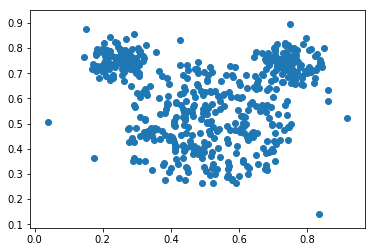

In [115]:
x1 = mickey[0].values
x2 = mickey[1].values
plt.scatter(x1, x2)

In [172]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples=50, random_state=20, n_estimators=100)

mickey_X = np.array([x1, x2]).T
clf.fit(mickey_X)
pred = clf.predict(mickey_X)
outliers = np.where(clf.predict(mickey_X) == -1)
outliers

(array([  5,  18,  30,  52,  67,  72,  84,  91, 111, 124, 136, 165, 185,
        189, 193, 194, 197, 217, 220, 227, 231, 265, 268, 279, 291, 306,
        316, 347, 358, 359, 367, 387, 388, 390, 398, 420, 424, 452, 466,
        470, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499]),)

Text(0.5,1,'Mickey')

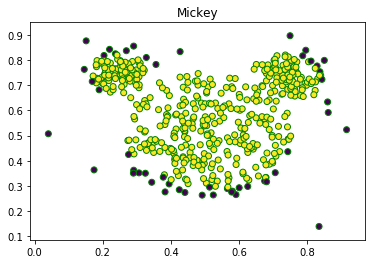

In [173]:
plt.scatter(x1, x2, c=pred, edgecolors='g')
plt.title('Mickey')

In [181]:
fraude = pd.read_csv("creditcard.csv")
fraude.drop('Time', inplace=True, axis=1)
fraude_X = fraude.drop('Class', axis = 1)
label = fraude.Class

In [235]:
clf_fraude = IsolationForest(random_state=50, n_jobs=-1, contamination=0.01)
clf_fraude.fit(fraude_X)

IsolationForest(bootstrap=False, contamination=0.01, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=-1, random_state=50,
        verbose=0)

In [236]:
pred = clf_fraude.predict(fraude_X)

In [237]:
pred2 = np.fromiter((int(x == -1) for x in pred), x.dtype)

In [230]:
from sklearn.metrics import confusion_matrix

In [238]:
tn, fp, fn, tp = confusion_matrix(label, pred2).ravel()

In [239]:
print(tn, fp, fn, tp)

281725 2590 233 259


In [240]:
precision = tp/(tp + fp)
recall = tp/(tp + fn)
specificity = tn/(tn + fp)
sensitivity = tp/(tp + fn)

Text(0,0.5,'specificity')

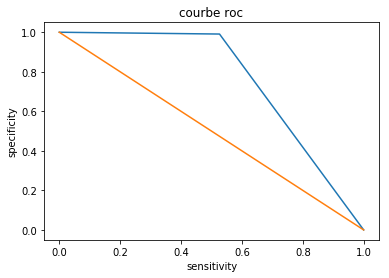

In [246]:
roc_x = [0, sensitivity, 1]
roc_y = [1, specificity, 0]
plt.plot(roc_x, roc_y)
plt.plot([1, 0], [0, 1])
plt.title('courbe roc')
plt.xlabel('sensitivity')
plt.ylabel('specificity')